In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
url = "https://github.com/wiflorez/Data-Visualization-tools/raw/master/data/fuel_econ.csv"
df = pd.read_csv(url)

df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [22]:

df['cat_var1']  = df['trans'].apply(lambda x: x.split()[0])
df['cat_var2']  = df['VClass']
df['num_var1']  = df['displ']
df['num_var2']  = df['comb']
df['num_var3']  = df['cylinders']

## Non-Positional Encodings for Third Variables
There are four major cases to consider when we want to plot three variables together:

three numeric variables
two numeric variables and one categorical variable
one numeric variable and two categorical variables
three categorical variables
If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. (You will see additional techniques later in the lesson that can also be applied to the other two cases, i.e. where we have at least two categorical variables.)

Three main non-positional encodings stand out: shape, size, and color. For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

## Encoding via Shape

In [19]:
df['cat_var1'].unique()

array(['Automatic', 'Manual'], dtype=object)

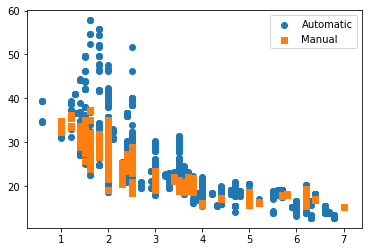

In [21]:
cat_markers = [['Automatic', 'o'],
               ['Manual', 's']]

for cat, marker in cat_markers:
    df_cat = df[df['cat_var1'] == cat]
    plt.scatter(data = df_cat, x = 'num_var1', y = 'num_var2', marker = marker)
plt.legend(['Automatic','Manual'])

## Encoding via Size

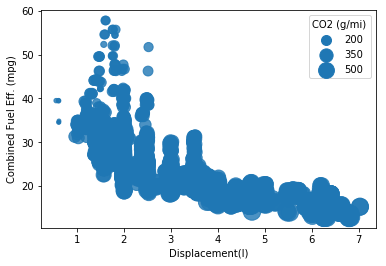

In [28]:
sb.regplot(data = df, x = 'displ', y = 'comb',
          x_jitter = 0.04, fit_reg = False, 
          scatter_kws = {'s': df['co2']/2});
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[], s = s/2,
                                 color = base_color))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

## Encoding via Color

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


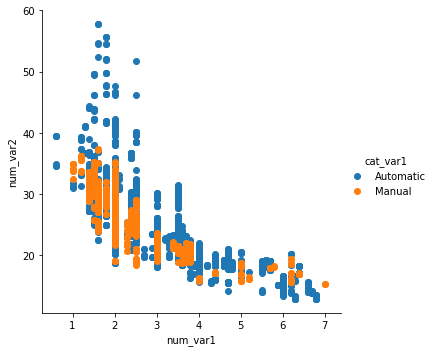

In [31]:
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5)
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()

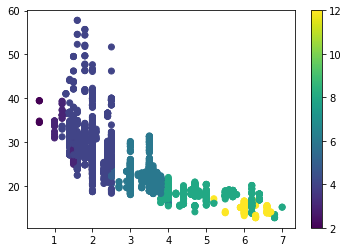

In [32]:
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', c = 'num_var3')
plt.colorbar()

Text(0, 0.5, 'Combined Fuel Eff')

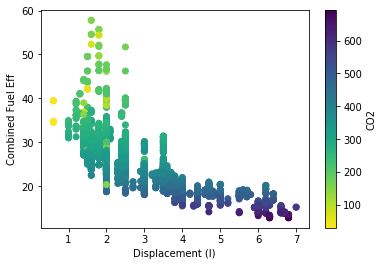

In [34]:
plt.scatter(data = df, x = 'displ', y = 'comb', c = 'co2', 
           cmap = 'viridis_r')
plt.colorbar(label = 'CO2')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff')

## Color Palettes
Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider: qualitative, sequential, and diverging.



**Qualitative** palettes are built for nominal-type data. This is the palette class taken by the default palette.

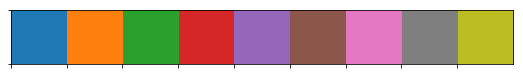

In [35]:
sb.palplot(sb.color_palette(n_colors=9))

In a **sequential** palette


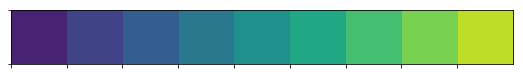

In [36]:
sb.palplot(sb.color_palette('viridis', 9))

However, if there is a meaningful zero or center value for the variable, you may want to consider using a **diverging palette**.

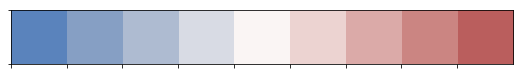

In [37]:
sb.palplot(sb.color_palette('vlag', 9))

## Selecting Color Palettes

**Qualitative** (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'  
**Sequential:** 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)  
**Diverging:** 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


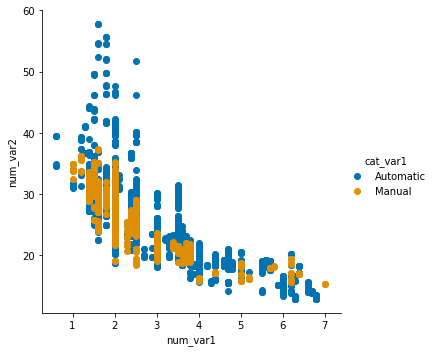

In [38]:
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()

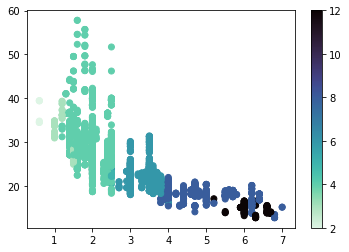

In [39]:
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', c = 'num_var3',
            cmap = 'mako_r')
plt.colorbar()

## Adaptations of Bivariate Plots

2-d histogram

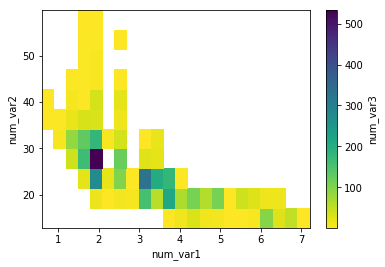

In [70]:
bin_size_x = df['num_var1'].min()/2
bin_size_y = df['num_var2'].min()/3

bins_x = np.arange(df['num_var1'].min(), df['num_var1'].max()+bin_size_x, bin_size_x)
bins_y = np.arange(df['num_var2'].min(),    df['num_var2'].max()+bin_size_y, bin_size_y)


plt.hist2d(data = df, x = 'num_var1', y = 'num_var2', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);
# count number of points in each bin
plt.xlabel('num_var1')
plt.ylabel('num_var2')
plt.colorbar(label = 'num_var3');

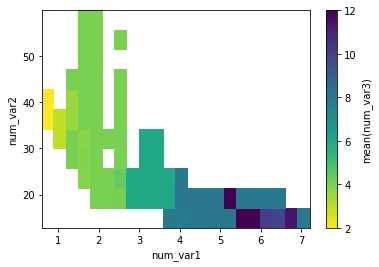

In [69]:
num_var_1_bins = pd.cut(df['num_var1'], bins_x, right = False,
                    include_lowest = True, labels = False).astype(int)
num_var_2_bins = pd.cut(df['num_var2'], bins_y, right = False,
                    include_lowest = True, labels = False).astype(int)
n_points = df.groupby([num_var_1_bins, num_var_2_bins]).size()
n_points = n_points.reset_index().pivot(index = 'num_var1', columns = 'num_var2').values
num_var_3_weights = df['num_var3']/n_points[num_var_1_bins, num_var_2_bins]

plt.hist2d(data = df, x = 'num_var1', y = 'num_var2', weights = num_var_3_weights,
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('num_var1')
plt.ylabel('num_var2');
plt.colorbar(label = 'mean(num_var3)');


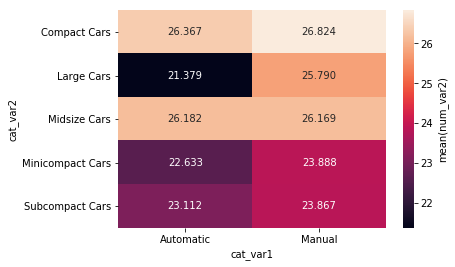

In [56]:
cat_means = df.groupby(['cat_var1', 'cat_var2']).mean()['num_var2']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'cat_var2', columns = 'cat_var1',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(num_var2)'})

clustered bar chart

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


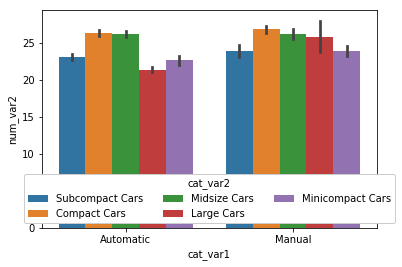

In [71]:
ax = sb.barplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

pointplot

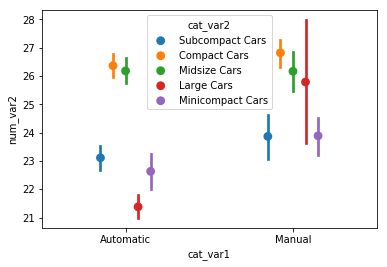

In [72]:
ax = sb.pointplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2',
                  dodge = 0.3, linestyles = "")

Lineplot

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


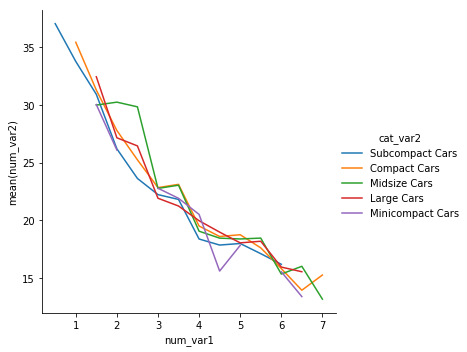

In [73]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'cat_var2', size = 5)
g.map(mean_poly, "num_var1", "num_var2", bins = bin_edges)
g.set_ylabels('mean(num_var2)')
g.add_legend()

## Plot Matrices
To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. Rather than generate these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

**PairGrid**

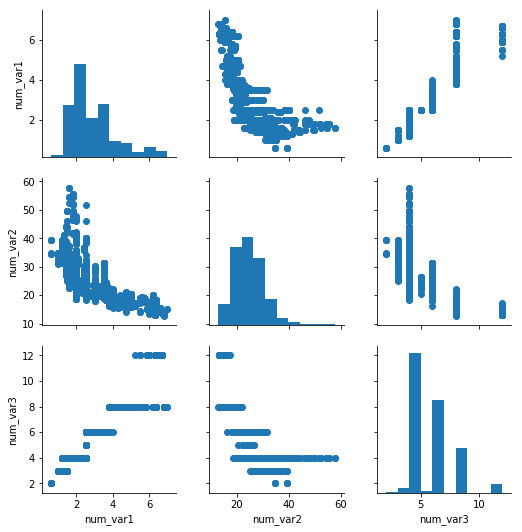

In [74]:
g = sb.PairGrid(data = df, vars = ['num_var1', 'num_var2', 'num_var3'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

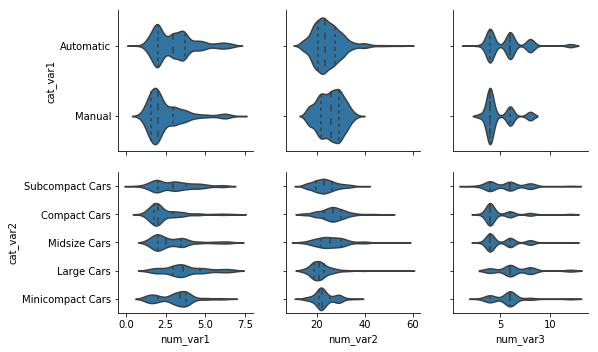

In [75]:
g = sb.PairGrid(data = df, x_vars = ['num_var1', 'num_var2', 'num_var3'],
                y_vars = ['cat_var1','cat_var2'])
g.map(sb.violinplot, inner = 'quartile')

### Correlation Matrices

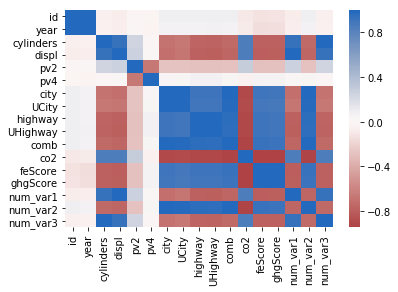

In [79]:
sb.heatmap(df.corr(), annot = False, fmt = '.1f', cmap = 'vlag_r', center = 0)